<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
!نه به دنیای رنگی
</font>
</h1>

---

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش کتابخانه‌های مورد نیاز برای انجام پروژه را وارد می‌کنیم.
</font>
</p>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بارگذاری تصاویر
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تصاویری که در به عنوان نمونه در اختیار شما قرار گرفته است را در سلول زیر بارگذاری کنید. و سپس به کمک <code>matplotlib</code> نمایش دهید.
</font>
</p>

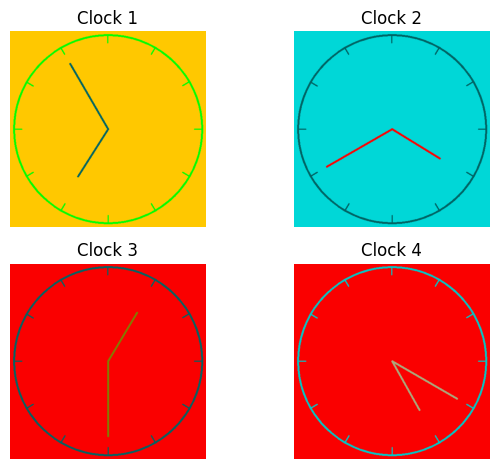

In [3]:
clock1 = cv2.imread('../Data/clock1.png')
clock2 = cv2.imread('../Data/clock2.png')
clock3 = cv2.imread('../Data/clock3.png')
clock4 = cv2.imread('../Data/clock4.png')

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(clock1, cv2.COLOR_BGR2RGB))
plt.title('Clock 1')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(clock2, cv2.COLOR_BGR2RGB))
plt.title('Clock 2')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(clock3, cv2.COLOR_BGR2RGB))
plt.title('Clock 3')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(clock4, cv2.COLOR_BGR2RGB))
plt.title('Clock 4')
plt.axis('off')
plt.tight_layout()
plt.show()


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابعاد تصاویر خوانده شده را نمایش دهید و با هم مقایسه کنید.
</font>
</p>

In [4]:
print(clock1.size)
print(clock2.size)
print(clock3.size)
print(clock4.size)
print(clock1.shape)
print(clock2.shape)
print(clock3.shape)
print(clock4.shape)
print(clock1.dtype)
print(clock2.dtype)
print(clock3.dtype)
print(clock4.dtype)
print(clock1.ndim)
print(clock2.ndim)
print(clock3.ndim)
print(clock4.ndim)
print(clock1.itemsize)
print(clock2.itemsize)
print(clock3.itemsize)
print(clock4.itemsize)



750000
750000
750000
750000
(500, 500, 3)
(500, 500, 3)
(500, 500, 3)
(500, 500, 3)
uint8
uint8
uint8
uint8
3
3
3
3
1
1
1
1


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
محاسبه میانگین روشنایی تصاویر
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در سلول زیر، تابعی بنویسید که تصویر را دریافت کرده و میانگین روشنایی تصویر را محاسبه کند. برای دقیق تر بودن میزان روشنایی محاسبه شده پیشنهاد میشود که ابتدا تصاویر را به مدل رنگی <code>YCrCb</code> ابتدا تبدیل کرده و سپس میزان روشنایی تصاویر را محاسبه و با هم مقایسه کنید.
</font>
</p>

In [5]:
def calculate_brightness(image):
    image_YCrCb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    Y_channel, Cr_channel, Cb_channel = cv2.split(image_YCrCb)
    mean_brightness = np.mean(Y_channel)
    return mean_brightness

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سیاه و سفید سازی
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در سلول زیر باید تابعی بنویسید که تصاویر ساعت با فرمت و شکلی که در اختیار شما قرار داده شده را دریافت کرده و آن را به یک تصویر تبدیل کند که صفحه ساعت سفید باشد و بقیه اجزای ساعت سیاه خالص باشد. دقت کنید این تصویر با مشخصات داده شده باید در نهایت به شکل سطح خاکستری return شود.
<br>
اسم تابع نباید تغییری داده شود. در غیر اینصورت نمره ای نخواهید گرفت.
</font>
</p>

In [6]:
def black_white_convertor(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    background_pixels = np.argmax(hist)
    mask = np.where(gray_image == background_pixels, 255, 0).astype(np.uint8)

    return mask

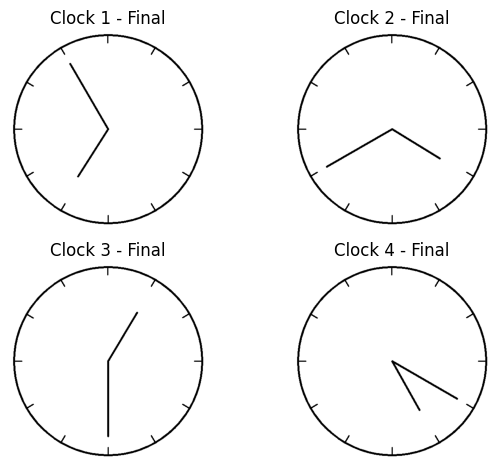

In [7]:
clock1_final = black_white_convertor(clock1)
clock2_final = black_white_convertor(clock2)
clock3_final = black_white_convertor(clock3)
clock4_final = black_white_convertor(clock4)

plt.subplot(2, 2, 1)
plt.imshow(clock1_final, cmap='gray')
plt.title('Clock 1 - Final')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(clock2_final, cmap='gray')
plt.title('Clock 2 - Final')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(clock3_final, cmap='gray')
plt.title('Clock 3 - Final')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(clock4_final, cmap='gray')
plt.title('Clock 4 - Final')
plt.axis('off')
plt.tight_layout()
plt.show()


<div dir="rtl">
<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>
</div>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [8]:
import zipfile
from inspect import getsource


def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

imp = """
import cv2
import numpy as np
"""

%save black_white_convertor imp + getsource(black_white_convertor)


file_names = ["black_white_convertor.py", "notebook.ipynb"]
compress(file_names)

The following commands were written to file `black_white_convertor.py`:

import cv2
import numpy as np
def black_white_convertor(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    background_pixels = np.argmax(hist)
    mask = np.where(gray_image == background_pixels, 255, 0).astype(np.uint8)

    return mask

File Paths:
['black_white_convertor.py', 'notebook.ipynb']
